### Beta Distribution

The probability density function (pdf) of the beta distribution, for 0 ≤ x ≤ 1, and shape parameters α, β > 0, is a power function of the variable x and of its reflection (1 − x) as follows:

   $f(x;α,β) = C x^{\alpha-1} (1-x)^{\beta - 1}$

where
    $C$ is the normilization constant.
    
https://en.wikipedia.org/wiki/Beta_distribution

### Binomial Distribution

$ f(k,n,p) = \left(\begin{matrix} n \\ k \end{matrix}\right) p^k (1-p)^{n-k} $

### Posterior of Binoimial Likelihood and Beta Prior

$
p = f_\mbox{beta} (p; \alpha, \beta) \; f_\mbox{bn} (k, n, p)  
    \\
 = C' p^{\alpha-1} (1-p)^{\beta-1} p^k (1-p)^{n-k}
 \\
= C' p^{\alpha+k-1} (1-p)^{\beta + (n-k) -1} 
\\
= f_\mbox{beta} (p, \alpha+k, \beta+(n-k))
$

So, the posterior is also a Beta Distribution.

### Problem

When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. Do these data give evidence that the coin is biased rather than fair?

#### Let's start
- Variable design:  $x$ is the probability of landing heads up when spun on edge.
- Hypotheses: we can consider $[0,100]$% of the probabilities for x. That is, $x$ may be $0$, $1$, ..., $100$%. Let's use $H_x$ to denote the hypothesis that the probability of head is $x$%.

In [3]:
import numpy as np

Prior = dict()
for x in range (0, 101):
    Prior[x] = x / 100.
print (Prior)

{0: 0.0, 1: 0.01, 2: 0.02, 3: 0.03, 4: 0.04, 5: 0.05, 6: 0.06, 7: 0.07, 8: 0.08, 9: 0.09, 10: 0.1, 11: 0.11, 12: 0.12, 13: 0.13, 14: 0.14, 15: 0.15, 16: 0.16, 17: 0.17, 18: 0.18, 19: 0.19, 20: 0.2, 21: 0.21, 22: 0.22, 23: 0.23, 24: 0.24, 25: 0.25, 26: 0.26, 27: 0.27, 28: 0.28, 29: 0.29, 30: 0.3, 31: 0.31, 32: 0.32, 33: 0.33, 34: 0.34, 35: 0.35, 36: 0.36, 37: 0.37, 38: 0.38, 39: 0.39, 40: 0.4, 41: 0.41, 42: 0.42, 43: 0.43, 44: 0.44, 45: 0.45, 46: 0.46, 47: 0.47, 48: 0.48, 49: 0.49, 50: 0.5, 51: 0.51, 52: 0.52, 53: 0.53, 54: 0.54, 55: 0.55, 56: 0.56, 57: 0.57, 58: 0.58, 59: 0.59, 60: 0.6, 61: 0.61, 62: 0.62, 63: 0.63, 64: 0.64, 65: 0.65, 66: 0.66, 67: 0.67, 68: 0.68, 69: 0.69, 70: 0.7, 71: 0.71, 72: 0.72, 73: 0.73, 74: 0.74, 75: 0.75, 76: 0.76, 77: 0.77, 78: 0.78, 79: 0.79, 80: 0.8, 81: 0.81, 82: 0.82, 83: 0.83, 84: 0.84, 85: 0.85, 86: 0.86, 87: 0.87, 88: 0.88, 89: 0.89, 90: 0.9, 91: 0.91, 92: 0.92, 93: 0.93, 94: 0.94, 95: 0.95, 96: 0.96, 97: 0.97, 98: 0.98, 99: 0.99, 100: 1.0}


In [5]:
def Likelihood (data, hypo):
    if data == 'H': # head
        return  hypo / 100
    else:
        return  1 - hypo/100
#

In [7]:
data = 'H'*140 + 'T'*110
print (data)

HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT


In [10]:
# let's compute the likelihood for each hypothesis
Likely = dict()
for hypo in Prior.keys():
    Likely[hypo] = 1
    for f in data:
        Likely[hypo] *= Likelihood (f, hypo)
    #
#
#print (Likely)

Posterior = Likelihood * Prior / Normalize

In [12]:
Posterior = dict()
for h in Prior.keys():
    Posterior[h] = Likely[h] * Prior[h]
#
evidence = 0
for h in Prior.keys():
    evidence += Posterior[h]
#
print ('Evidence = ', evidence)

for h in Prior.keys():
    Posterior[h] = Posterior[h] / evidence

Evidence =  1.4743007568881398e-74


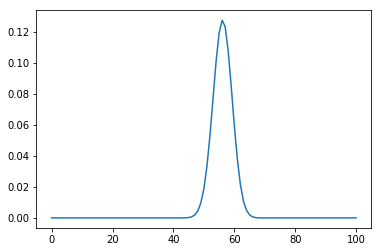

In [25]:
from matplotlib import pyplot as plt

post = list(Posterior.values())
plt.plot (post)

In [75]:
# posterior mean

max = (0,Posterior[0]);
mean = 0
for h, v in Posterior.items():
    mean += h * v
    if max[1] < v: max = (h,v)
#
print ('Posterior Mean = {:.2f}   Max= {}'.format(mean, max))

Posterior Mean = 56.13   Max= (56, 0.12756165137589734)


@ median =  56


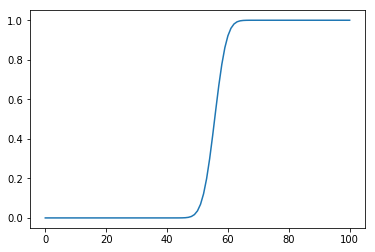

In [63]:
# cdf & median
cdf = dict()
cdf[0] = 0
for h,v in Posterior.items():
    if h > 0:
        cdf[h] = cdf[h-1] + Posterior[h]
#
plt.plot (list(cdf.values()))

In [65]:
# median is the point where cdf == 0.5
for h in cdf:
    if cdf[h] > 0.5: break
print ('@ median = ', h)

@ median =  56


In [50]:
print ('Posterior(50%) = ', Posterior[50], Posterior[56])

Posterior(50%) =  0.018744980796614377 0.12756165137589734


In [70]:
def Percentile (cdf, pcnt):
    for h in cdf:
        if cdf[h] > pcnt/100: break
    return h

In [71]:
print (Percentile(cdf, 10), Percentile(cdf, 90))

52 60


In [73]:
def CredibleInterval (cdf, p):
    step = (100 - p) / 2;
    return Percentile(cdf, step), Percentile(cdf, 100 -  step)

In [74]:
CredibleInterval(cdf, 90)

(51, 61)

### Summary

- Posterior credible interval does not include 50%, which suggests that the coin is not fair.
- We must be more precise about what it means to say that data constitute evidence for a hypothesis. Next chapter.

### Using Beta Distribution as Proior
- Uniform distribution between [0,1] when $\alpha=1$, $\beta = 1$.

$P_\mbox{beta} = C_\mbox{beta}\; x^{\alpha-1} \; (1-x)^{\beta-1} = \mbox{Beta}(x; \alpha, \beta)$

In [79]:
class Beta :
    def __init__(self, alpha=1, beta=1):
        self.alpha = alpha
        self.beta = beta

In [80]:
beta = Beta()

- Likelihood for (140, 110) heads and tails is a binomial distribution with probability $x$

$L = C_L \; x^{140} \; (1-x)^{110}$

- Therefore, the posterior distribution is the multiplication of the two

$ P((140,110) | x) = P_\mbox{beta} * L = C\; x^{\alpha-1+140} \; (1-x)^{\beta-1+110} = \mbox{Beta}(x; \alpha+140, \beta+110) = \mbox{Beta}(x; 141, 111)$

In [81]:
from scipy.stats import beta

In [99]:
a = 141
b = 111

cdf = {}
cdf[0] = beta.cdf(0, a, b)
pmf = {}
pmf[0] = beta.cdf(0, a, b)
for p in range(1, 101):
    cdf[p] = beta.cdf(p/100, a, b)
    pmf[p] = beta.cdf(p/100, a, b) - beta.cdf((p-1)/100, a, b)

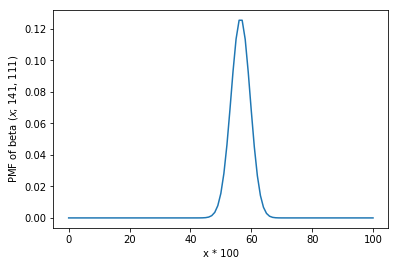

In [105]:
plt.xlabel('x * 100')
plt.ylabel('PMF of beta ($x$; {}, {})'.format(a,b))
plt.plot (list(pmf.values()))

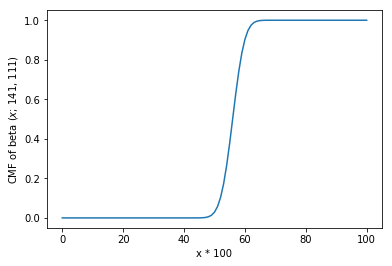

In [106]:
plt.xlabel('x * 100')
plt.ylabel('CMF of beta ($x$; {}, {})'.format(a,b))
plt.plot (list(cdf.values()))